#**  Bioinformatics Data Mining and Analysis **


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import and prepare table for analysis
df = pd.read_table('/content/drive/MyDrive/כרייה ואנליזה של נתונים ביו/Ex1/skin_and_keyboard_microbiome.csv', sep=',', header=0)
df.set_index('#OTU_ID', inplace=True)
df_taxonomy = df.select_dtypes(include={'object'})
df.drop(columns='taxonomy', inplace=True)
new_column_names = df.columns.map(lambda x: x.split('.')[1])
df.columns = new_column_names
df_ra = df.truediv(df.sum(axis=0), axis=1)
df_ra

,M2Ikey217,M2Bkey217,M2Ckey217,M2Dkey217,M2Midr217,M2Nkey217,M2Pinr217,M2Skey217,M2Tkey217,M3Lkey217,...,M9Fkey217,M9Kkey217,M9Pkey217,R1Space217,U2Space217,M3Akey217,M10Space217,M11Space217,M3Indr217,M3Kkey217
#OTU_ID,,,,,,,,,,,,,,,,,,,,,
643311,0.00066,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050608,0.00000,0.001457,0.000864,0.00303,0.000797,0.002155,0.001692,0.000704,0.002185,0.000756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286945,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279699,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221284,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876945,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950496,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634029,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Import the file from metadata
df_sample_data = pd.read_table('/content/drive/MyDrive/כרייה ואנליזה של נתונים ביו/Ex3/Sample_data.csv', sep=',', header=0)
# Remove empty rows if any
df_sample_data.dropna(axis=0, inplace=True)
df_sample_data


,Sample Number,Sample ID,Sample Type,No. of sequences,Study
0,1.0,14SK2001,"20degC, day 14",2201.0,storage
1,2.0,14SK2002,"20degC, day 14",1943.0,storage
2,3.0,14SK2003,"20degC, day 14",2389.0,storage
3,4.0,14SK201,"-20degC, day 14",2215.0,storage
4,5.0,14SK202,"-20degC, day 14",2279.0,storage
...,...,...,...,...,...
407,408.0,M9Ykey217,key,821.0,keyboard
408,409.0,R1Space217,key,954.0,keyboard
409,410.0,U1Space217,key,448.0,keyboard
410,411.0,U2Space217,key,701.0,keyboard


In [ ]:
# Focus on the first experiment called 'keyboard'
# Filter the dataset to include only the relevant samples

keyboard_sample_ids = df_sample_data[df_sample_data['Study']=='keyboard']['Sample ID']
df_keyboard = df_ra.loc[:, keyboard_sample_ids]
print(df_keyboard.shape)
df_keyboard

(2495, 115)


,F10Space217,F11Space217,F12Space217,L1Space217,L3Space217,M10Space217,M11Space217,M2Akey217,M2Bkey217,M2Ckey217,...,M9Thml217,M9Thmr217,M9Vkey217,M9Wkey217,M9Xkey217,M9Ykey217,R1Space217,U1Space217,U2Space217,U3Space217
#OTU_ID,,,,,,,,,,,,,,,,,,,,,
643311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1050608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001457,0.000864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003534
286945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
279699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2221284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1950496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1634029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
# There are still samples unrelated to the first experiment (collected from the keyboard for other experiments)
# We are interested in experiments whose names start with the letter 'M'

df_keyboard = df_keyboard.filter(regex='^M[2,3,9]')

In [ ]:
df_keyboard

,M2Akey217,M2Bkey217,M2Ckey217,M2Dkey217,M2Ekey217,M2Enter217,M2Fkey217,M2Gkey217,M2Hkey217,M2Ikey217,...,M9Rinl217,M9Rinr217,M9Skey217,M9Space217,M9Thml217,M9Thmr217,M9Vkey217,M9Wkey217,M9Xkey217,M9Ykey217
#OTU_ID,,,,,,,,,,,,,,,,,,,,,
643311,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050608,0.0,0.001457,0.000864,0.00303,0.000968,0.000000,0.0,0.0,0.000872,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286945,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279699,0.0,0.000000,0.000000,0.00000,0.000000,0.000666,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221284,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876945,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950496,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634029,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The samples starting with the letter M refer to an experiment that analyzed three keyboards from different individuals. Each value starting with M represents samples taken from a specific person's keyboard.

For example:

M2 indicates samples taken from person B's keyboard.
M3 indicates samples taken from person C's keyboard.
Similarly, each letter represents a different person's keyboard.
The different types of samples represent the specific keys on the keyboard from which the samples were taken, with each person having samples from all the letters on the keyboard. The rows indicate the amount of bacteria found at each specific location on the keyboard.

By classifying the samples using the letter M, it is possible to analyze the differences between samples taken from the keyboards of different users.

In [ ]:
#In order to perform the analyses, a new library needs to be installed
!pip install scikit_bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 83.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit_bio: filename=scikit_bio-0.6.1-cp310-cp310-linux_x86_64.whl size=3946403 sha256=a390c039ccc9bf79c53d9af55d0d37d09fc469578258a4499be58a33fe72287a
  Stored in directory: /root/.cache/pip/wheels/f3/61/46/eec16fd2a21988a2aa06c6d3aafb2189c904a8b78d6264e280
  Created wheel for biom-format: filename=biom_format-2.1.16-cp310-cp310-linux_x86_64.whl size=12158823 sha256=df6ce20a1ab83a86bc970d22766a603f5768fe665c487e4e67bfce6800a1918a
  Stored in directory: /root/.cache/pip/wheels/8e/a9/f9/197fd5a0e5bbab5f2e03c89194f6c194bed7af5d7a8c8759f3
Successf

In [ ]:
from skbio.stats.ordination import pcoa as skbio_pca
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We will examine the samples and their relationships – who is similar to whom and who differs from whom.


Our hypothesis before investigation: We expect to observe the connection mentioned in the article, meaning we should see similar bacteria on the person and the keyboard belonging to that person.


In other words, our hypothesis is whether the bacteria count on the person and their keyboard is similar, and if this is reliable enough to prove that the same person touched the same object (thus potentially linking people to objects through the same bacteria)

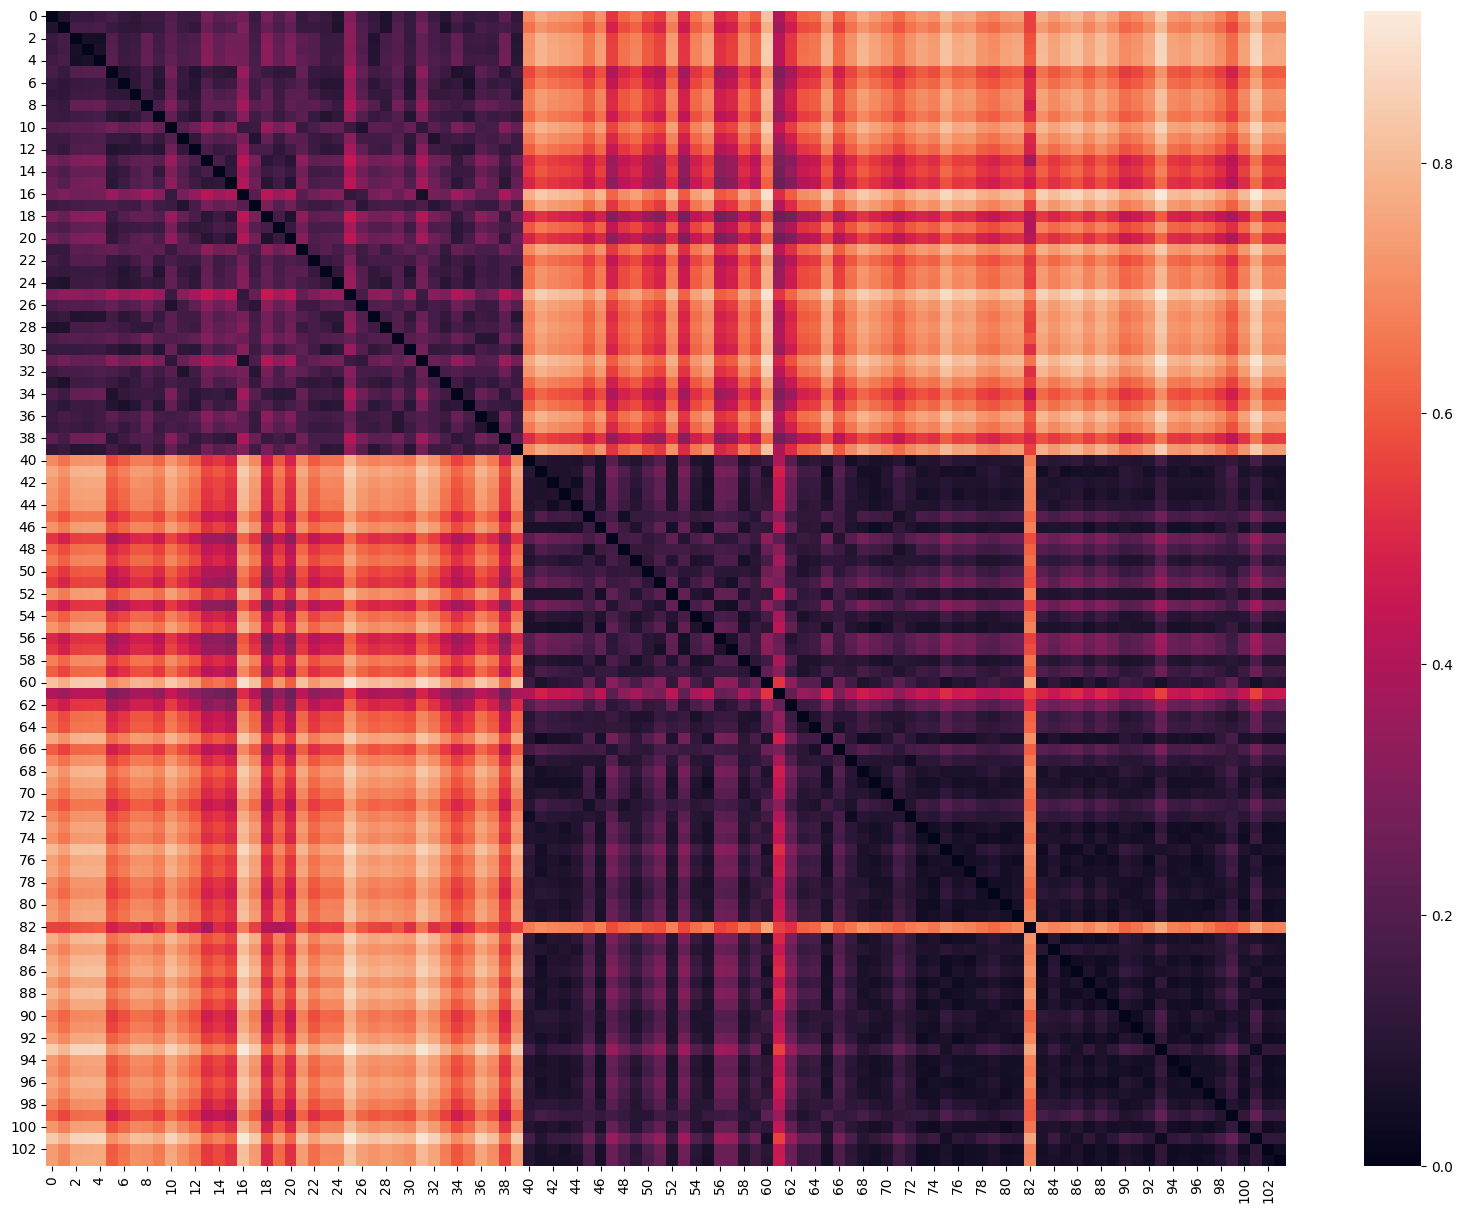

In [ ]:
#Measuring distances between the samples and displaying them on a heatmap.
distmat = pairwise_distances(df_keyboard.T, metric='euclidean', force_all_finite=True)
plt.figure(figsize=(20,15))
sns.heatmap(distmat)
plt.show()

In [ ]:
# The table size is 104, corresponding to the number of samples
print(distmat.shape)

(104, 104)


In [ ]:
#Checking the symmetry of the map
(distmat == distmat.T).all()

False

It appears symmetric, but I received an asymmetric result, which is due to the calculation not being precise enough and rounding numbers.

In [ ]:
# Another function for calculating distances
from scipy.spatial.distance import pdist, squareform

In [ ]:
dist = pdist(df_keyboard.T)
# Converting from numbers to a heatmap
sq = squareform(dist)
sq

array([[0.        , 0.0822481 , 0.13889341, ..., 0.84163   , 0.73472538,
        0.73736793],
       [0.0822481 , 0.        , 0.1685174 , ..., 0.79423206, 0.68724979,
        0.6897317 ],
       [0.13889341, 0.1685174 , 0.        , ..., 0.862214  , 0.75542427,
        0.75780204],
       ...,
       [0.84163   , 0.79423206, 0.862214  , ..., 0.        , 0.11188008,
        0.11207663],
       [0.73472538, 0.68724979, 0.75542427, ..., 0.11188008, 0.        ,
        0.0325478 ],
       [0.73736793, 0.6897317 , 0.75780204, ..., 0.11207663, 0.0325478 ,
        0.        ]])

In [ ]:
from  skbio.stats.distance import DistanceMatrix
pcoa = skbio_pca(DistanceMatrix(sq, df_keyboard.T.index))

<Axes: >

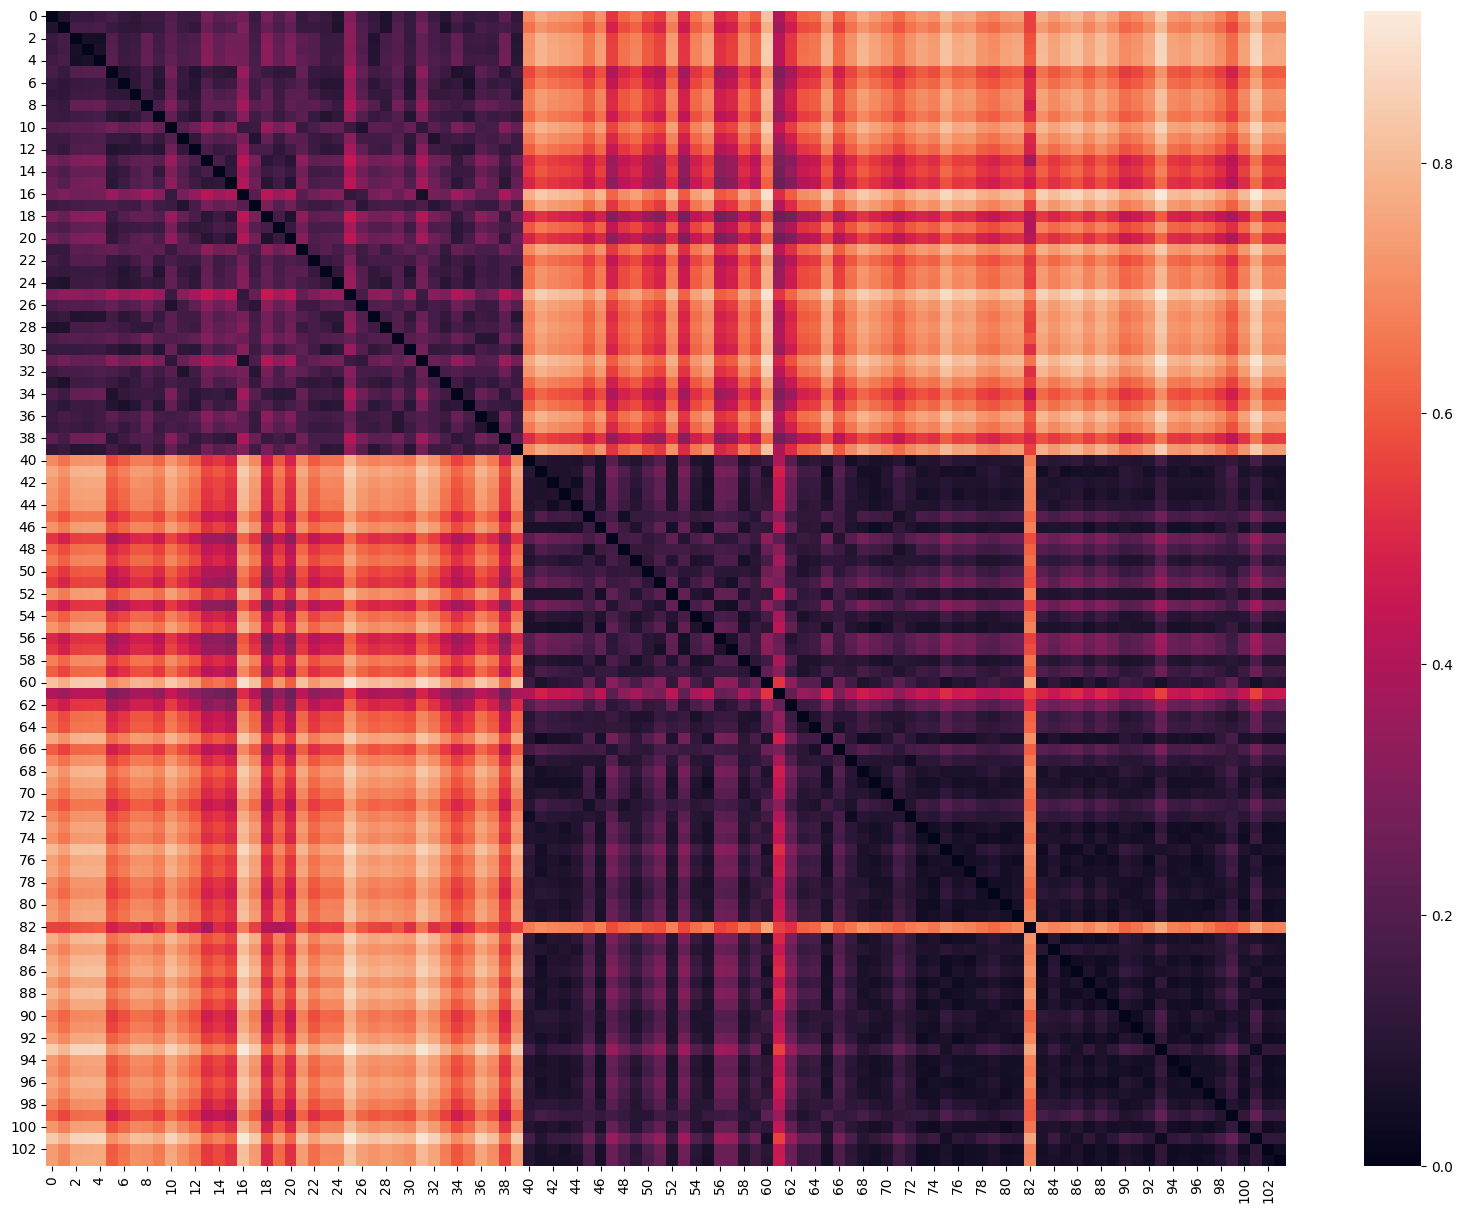

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(sq)

In [ ]:
# Checking symmetry
(sq == sq.T).all()

True

Symmetric result due to more accurate calculations

********

Dimensionality reduction on the distance matrix using PCoA

In [ ]:
from skbio.stats.ordination import pcoa
from skbio import DistanceMatrix
import numpy as np
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

pcoa_PCOA =pcoa(sq)

/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.054604356523352486 and the largest is 12.273945149772377.
  warn(


In [ ]:
# Calculation of the variance explained by each component
pcoa_results = pcoa_PCOA.samples

pcoa_results

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
0,-0.544962,-0.029792,-0.036545,0.012627,0.059771,-0.047915,-0.140949,-0.000337,-0.045101,-0.060707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.482647,0.100322,0.021299,0.053767,0.102654,-0.068925,-0.101678,0.033650,0.037403,0.012631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.525708,-0.171409,-0.338040,0.131240,-0.153754,-0.042495,0.017044,0.004782,0.006129,0.021390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.533543,-0.197657,-0.298595,0.125582,-0.082736,0.025748,-0.003202,0.007683,0.028278,0.029080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.506298,-0.174117,-0.362828,0.142645,-0.130995,-0.021557,0.030207,0.045387,0.032199,0.099934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.214600,0.049973,0.047669,0.042466,-0.010892,0.004903,0.028834,-0.004115,0.110777,-0.013514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.253247,0.021850,0.035423,0.097403,-0.019899,0.001800,-0.005577,0.005003,-0.003429,-0.045684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.298217,-0.038968,0.033028,0.108413,-0.024165,0.013935,-0.017488,-0.015739,-0.017891,-0.010301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.258153,0.000649,0.039101,0.091286,0.016863,0.012294,0.011064,-0.007642,0.004115,0.025748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


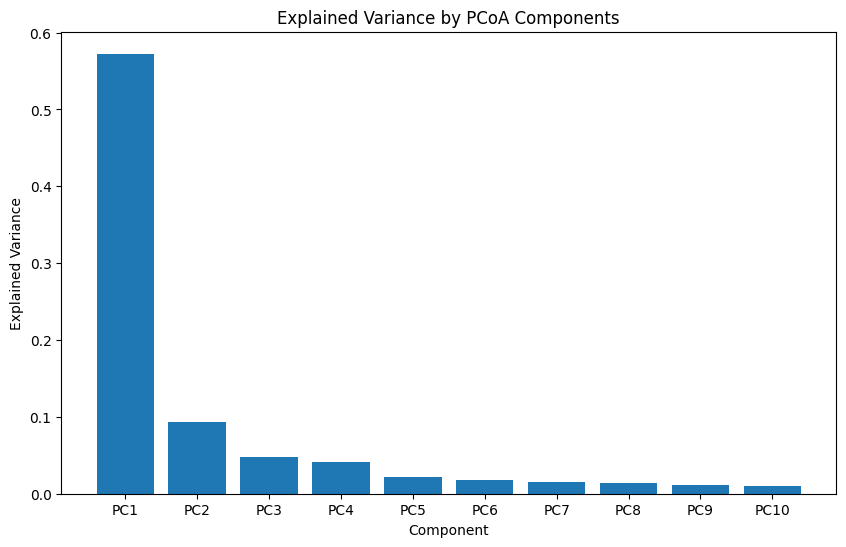

In [ ]:
#Variance plot
explained_var=pcoa_PCOA.proportion_explained[:10]

plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_var)), explained_var)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by PCoA Components')
plt.xticks(range(len(explained_var)), [f'PC{i+1}' for i in range(len(explained_var))])
plt.show()


The Y-axis shows the percentage of variance per component.

The X-axis represents the PCs we have.

*****

**Plotting the samples in the space**

Two ways to plot the samples in the PC1 x PC2 space

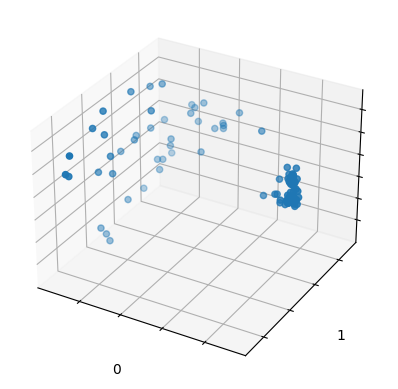

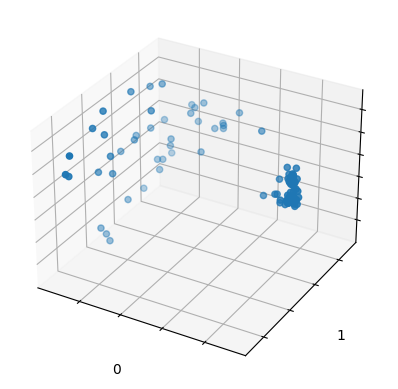

In [ ]:
#It is hard to distinguish between the samples due to the lack of different coloring for each sample
pcoa_PCOA.plot()

In [ ]:
df_sample_data_for_plot=df_sample_data.set_index('Sample ID')
df_sample_data_for_plot=df_sample_data_for_plot.loc[df_keyboard.columns]
# Adding color to the samples by adding a new column to the data indicating which person the sample came from
def check_volunteer(sample_id):
    if sample_id.startswith(('M2', 'M3', 'M9')):
        return sample_id[:2]
    else:
        return np.nan

#Adding the column to the data based on the index
df_sample_data_for_plot['volunteer'] = df_sample_data_for_plot.index.to_series().apply(check_volunteer)

#Verification that the column has been added
df_sample_data_for_plot

,Sample Number,Sample Type,No. of sequences,Study,volunteer
M2Akey217,192.0,key,1183.0,keyboard,M2
M2Bkey217,193.0,key,1301.0,keyboard,M2
M2Ckey217,194.0,key,1120.0,keyboard,M2
M2Dkey217,195.0,key,951.0,keyboard,M2
M2Ekey217,196.0,key,1010.0,keyboard,M2
...,...,...,...,...,...
M9Thmr217,404.0,finger,1665.0,keyboard,M9
M9Vkey217,405.0,key,1485.0,keyboard,M9
M9Wkey217,406.0,key,1157.0,keyboard,M9
M9Xkey217,407.0,key,960.0,keyboard,M9


In [ ]:
# PCoA table modification to make it suitable for calculation.
#The code calculates a distance matrix between the columns of df_keyboard and converts
#it into a square matrix. Then, PCoA calculation is performed on the square matrix.

from skbio.stats.distance import DistanceMatrix
dist=pdist(df_keyboard.T)
sq=squareform(dist)
pcoa_PCOA=skbio_pca(DistanceMatrix(sq, df_keyboard.T.index))

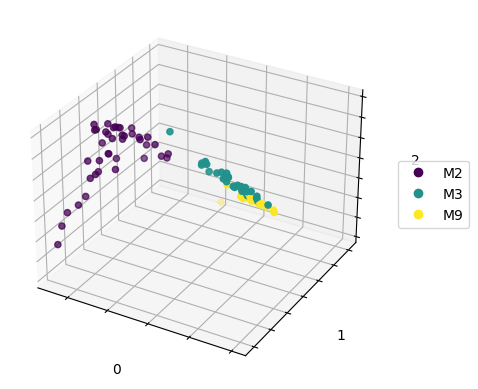

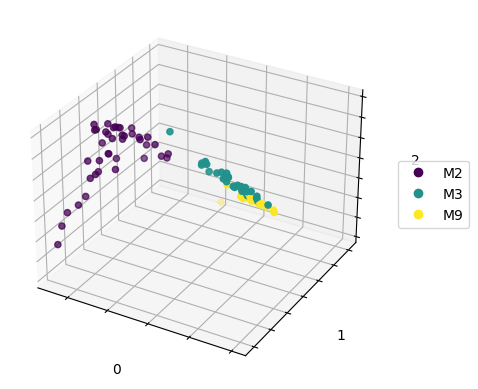

In [ ]:
# Plotting the graph with colors
pcoa_PCOA.plot(df_sample_data_for_plot, column='volunteer')

**Second way**

In [ ]:
# Plotting the graph by converting the distance table to a DataFrame
pcoa_df = pd.DataFrame(pcoa_PCOA.samples)
pcoa_df.index = df_keyboard.T.index
pcoa_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
M2Akey217,-0.438641,-0.001313,0.018908,-0.027349,0.046614,0.025241,-0.017812,-0.001869,0.010940,-0.009181,...,0.000002,-0.000613,-0.000075,-0.000006,0.000205,-0.000018,-0.000089,-0.000012,-0.000041,-0.0
M2Bkey217,-0.388765,0.000824,0.035568,-0.045156,0.064926,0.012657,-0.000031,-0.006042,-0.002484,-0.000911,...,-0.000765,-0.000392,-0.000087,0.000157,-0.000033,-0.000001,-0.000159,-0.000043,0.000083,-0.0
M2Ckey217,-0.454399,-0.014368,0.053457,-0.004359,-0.069527,0.048196,-0.012013,-0.024410,0.008281,-0.007934,...,-0.000027,0.000057,-0.000114,-0.000024,0.000069,-0.000101,-0.000106,0.000011,-0.000015,-0.0
M2Dkey217,-0.457671,-0.019555,0.053581,-0.009263,-0.064962,0.049149,-0.015674,-0.018137,0.012727,0.003399,...,-0.000200,0.000129,-0.000047,0.000044,-0.000042,-0.000008,-0.000015,-0.000156,-0.000053,-0.0
M2Ekey217,-0.457894,-0.021785,0.067852,-0.011062,-0.074264,0.049858,-0.007469,-0.023643,0.008596,0.000643,...,0.000149,0.000011,0.000192,-0.000027,-0.000016,0.000076,0.000041,0.000020,0.000006,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9Thmr217,0.169484,0.003359,0.001639,-0.026565,-0.007844,-0.009815,0.021316,0.007878,-0.006030,0.024212,...,-0.001366,0.000541,0.000222,0.002051,-0.000062,0.001715,0.000167,-0.000712,-0.000530,-0.0
M9Vkey217,0.276878,0.017503,-0.024520,-0.018523,-0.005956,0.006611,0.005183,0.002569,0.001282,0.000993,...,-0.000362,0.004396,-0.001955,-0.000247,-0.002148,-0.003851,0.001260,-0.000726,-0.000702,-0.0
M9Wkey217,0.399001,-0.007007,-0.027287,-0.021254,-0.001867,0.011073,0.002128,0.000726,0.000034,-0.004076,...,0.000598,0.000907,-0.001446,0.000569,0.000268,0.001322,-0.001269,0.005128,-0.003028,-0.0
M9Xkey217,0.291359,-0.000822,-0.014541,-0.023313,-0.004639,0.003167,0.007102,0.006712,-0.000412,0.004769,...,0.001243,-0.004479,-0.000208,0.002226,-0.002178,-0.002180,0.000994,-0.000182,-0.000910,-0.0


In [ ]:
# Adding to the table
pcoa_df_merged = pcoa_df.merge(df_sample_data_for_plot, left_index=True, right_index=True, how='inner')
pcoa_df_merged


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC100,PC101,PC102,PC103,PC104,Sample Number,Sample Type,No. of sequences,Study,volunteer
M2Akey217,-0.438641,-0.001313,0.018908,-0.027349,0.046614,0.025241,-0.017812,-0.001869,0.010940,-0.009181,...,-0.000018,-0.000089,-0.000012,-0.000041,-0.0,192.0,key,1183.0,keyboard,M2
M2Bkey217,-0.388765,0.000824,0.035568,-0.045156,0.064926,0.012657,-0.000031,-0.006042,-0.002484,-0.000911,...,-0.000001,-0.000159,-0.000043,0.000083,-0.0,193.0,key,1301.0,keyboard,M2
M2Ckey217,-0.454399,-0.014368,0.053457,-0.004359,-0.069527,0.048196,-0.012013,-0.024410,0.008281,-0.007934,...,-0.000101,-0.000106,0.000011,-0.000015,-0.0,194.0,key,1120.0,keyboard,M2
M2Dkey217,-0.457671,-0.019555,0.053581,-0.009263,-0.064962,0.049149,-0.015674,-0.018137,0.012727,0.003399,...,-0.000008,-0.000015,-0.000156,-0.000053,-0.0,195.0,key,951.0,keyboard,M2
M2Ekey217,-0.457894,-0.021785,0.067852,-0.011062,-0.074264,0.049858,-0.007469,-0.023643,0.008596,0.000643,...,0.000076,0.000041,0.000020,0.000006,-0.0,196.0,key,1010.0,keyboard,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9Thmr217,0.169484,0.003359,0.001639,-0.026565,-0.007844,-0.009815,0.021316,0.007878,-0.006030,0.024212,...,0.001715,0.000167,-0.000712,-0.000530,-0.0,404.0,finger,1665.0,keyboard,M9
M9Vkey217,0.276878,0.017503,-0.024520,-0.018523,-0.005956,0.006611,0.005183,0.002569,0.001282,0.000993,...,-0.003851,0.001260,-0.000726,-0.000702,-0.0,405.0,key,1485.0,keyboard,M9
M9Wkey217,0.399001,-0.007007,-0.027287,-0.021254,-0.001867,0.011073,0.002128,0.000726,0.000034,-0.004076,...,0.001322,-0.001269,0.005128,-0.003028,-0.0,406.0,key,1157.0,keyboard,M9
M9Xkey217,0.291359,-0.000822,-0.014541,-0.023313,-0.004639,0.003167,0.007102,0.006712,-0.000412,0.004769,...,-0.002180,0.000994,-0.000182,-0.000910,-0.0,407.0,key,960.0,keyboard,M9


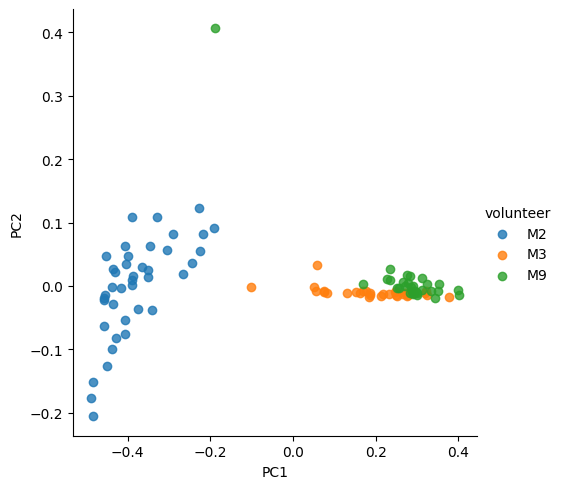

In [ ]:
# Another plotting function
# seaborn
sns.lmplot(x='PC1', y='PC2', data=pcoa_df_merged, hue='volunteer', legend=True, fit_reg=False)

**The main conclusion from looking at the generated graph:**

It is very clear from the graph that the samples from person M2 are distinct and unique to him only.

However, the samples from M3 and M9, although separated, are very close and even overlap with each other. Therefore, the separation between them is not 100%, and it is likely that identification based solely on this will not be reliable.

****

/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.054604356523352486 and the largest is 12.273945149772377.
  warn(


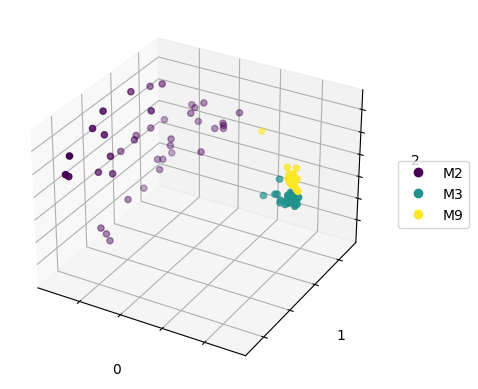

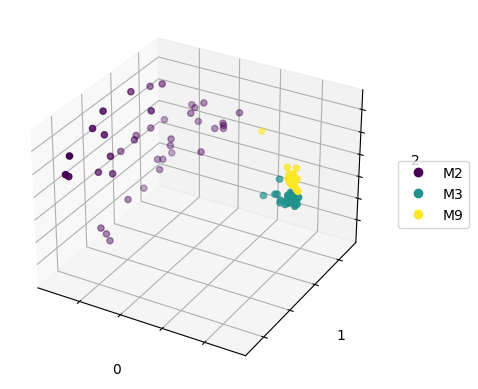

In [ ]:
#Performing the process by measuring the Euclidean distance called Bray-Curtis.

dist = pdist(df_keyboard.T, metric='braycurtis')
sq = squareform(dist)
pcoa_bray_curtis = skbio_pca(DistanceMatrix(sq, df_keyboard.T.index))

explained_variance=pcoa.proportion_explained
pcoa_bray_curtis.plot(df_sample_data_for_plot, column='volunteer')


In [ ]:
explained_variance

PC1      0.572561
PC2      0.093235
PC3      0.047283
PC4      0.041642
PC5      0.021997
           ...   
PC100    0.000000
PC101    0.000000
PC102    0.000000
PC103    0.000000
PC104    0.000000
Length: 104, dtype: float64

**Conclusion:**


It can be seen what percentage each PC contributed. The more primary it is, the more it contributed. PC1 contributed 57.2%, which is the highest contribution to the variance.
PC2 contributed 9.3%, which is less but still a higher contribution.
It is clear that the later PCs did not contribute to the variance at all.

In the first method, most of the variance is explained (+90%), meaning that the variance explained in this method is much higher than the variance explained in the last method.

**Regarding the graph we obtained:**

It is clear that the separation of individuals is more apparent in the space, not just in two dimensions but also in depth. Additionally, we can easily see that the samples from the first person are spread out, occupying a large area in the space, and are not clustered. Moreover, they are far from the samples of the other two individuals.

On the other hand, we can see that the samples from the other two individuals (3 and 9) are very close to each other and near one another.

However, in the previous method, we saw that the samples were less dispersed and more organized, which is better for distinguishing between the samples.

In conclusion, the first method is better because it clearly shows the distribution in the space, and the grouping is more clustered and concentrated.